# when does alg. X outperform alg. Y?

The goal here is to compare performance between two algorithms (not algorithm classes). 

In [1]:
metric = "Accuracy"
obj_type = "max"

alg_x = "CatBoost"
alg_y = "rtdl_ResNet"

In [2]:
# get tuned alg results for each split separately

import pandas as pd
import numpy as np

metadataset_df = pd.read_csv("./results/tuned_fold_results.csv")

In [3]:
# read cleaned metafeatures file
keep_metafeatures_df = pd.read_csv("./results/cleaned_metafeatures.csv", index_col=0)

# drop cols that are all NaN

# keep_metafeatures_df.loc[keep_metafeatures_df.isna().sum() > 0, :]
na_feats = keep_metafeatures_df.isna().sum() == len(keep_metafeatures_df)
na_feat_names = list(na_feats[na_feats].index)
print(f"dropping cols with only NA: {na_feat_names}")
keep_metafeatures_df.drop(columns=na_feat_names, inplace=True)

# replace inf with something else
keep_metafeatures_df.replace([np.inf, -np.inf], 0.0, inplace=True)

all_feature_cols = [c for c in keep_metafeatures_df.columns if c.startswith("f__")]

def simplify(x):
    return x.replace("statistical", "stat").replace("model-based", "model").replace("landmarking", "landmark").replace("skewness", "skew")

nice_feature_names = [simplify(f[len("f__pymfe."):]) for f in all_feature_cols]

dropping cols with only NA: ['f__pymfe.statistical.iq_range', 'f__pymfe.statistical.t_mean']


## merge performance dataset with metafeatures

In [4]:
# get difference in performance between alg x and alg y for each split

df_x = metadataset_df.loc[metadataset_df["alg_name"] == alg_x, :]
df_x.rename(columns={f"normalized_{metric}__test": f"performance_{alg_x}"}, inplace=True)

df_y = metadataset_df.loc[metadataset_df["alg_name"] == alg_y, :]
df_y.rename(columns={f"normalized_{metric}__test": f"performance_{alg_y}"}, inplace=True)

diff_df = df_x.merge(df_y, on="dataset_fold_id", how="inner").merge(keep_metafeatures_df, left_on="dataset_fold_id", right_on="dataset_name", how="left")

diff_df.loc[:, "performance_diff_x_minus_y"] = diff_df[f"performance_{alg_x}"] - diff_df[f"performance_{alg_y}"]

/var/folders/mv/xx16lc8s74g35q1kd_93l7_w0000gn/T/ipykernel_59057/258099209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.rename(columns={f"normalized_{metric}__test": f"performance_{alg_x}"}, inplace=True)
/var/folders/mv/xx16lc8s74g35q1kd_93l7_w0000gn/T/ipykernel_59057/258099209.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y.rename(columns={f"normalized_{metric}__test": f"performance_{alg_y}"}, inplace=True)


In [5]:
diff_df.head()

,Unnamed: 0_x,results_bucket_path_x,dataset_fold_id,dataset_name_x,target_type_x,alg_name_x,hparam_source_x,trial_number_x,alg_hparam_id_x,exp_name_x,...,f__pymfe.info-theory.mut_inf.median,f__pymfe.info-theory.mut_inf.min,f__pymfe.info-theory.mut_inf.quantiles.1,f__pymfe.info-theory.mut_inf.quantiles.3,f__pymfe.info-theory.mut_inf.range,f__pymfe.info-theory.mut_inf.sd,f__pymfe.info-theory.mut_inf.skewness,f__pymfe.info-theory.ns_ratio,dataset_family,performance_diff_x_minus_y
0,0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_27_s0,27,CatBoost__seed_0__trial_27,gpu-expt-a_091822_065111_fdd9.zip,...,0.034458,0.002171,0.01528,0.069672,0.197973,0.062782,0.751749,18.249693,openml__APSFailure__168868,-0.019608
1,1,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_1,openml__APSFailure__168868,binary,CatBoost,random_3_s0,3,CatBoost__seed_0__trial_3,gpu-expt-a_091822_065111_fdd9.zip,...,0.034458,0.002171,0.01528,0.069672,0.197973,0.062782,0.751749,18.249693,openml__APSFailure__168868,0.206897
2,2,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_2,openml__APSFailure__168868,binary,CatBoost,random_8_s0,8,CatBoost__seed_0__trial_8,gpu-expt-a_091822_065111_fdd9.zip,...,0.034458,0.002171,0.01528,0.069672,0.197973,0.062782,0.751749,18.249693,openml__APSFailure__168868,0.043956
3,3,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_3,openml__APSFailure__168868,binary,CatBoost,random_20_s0,20,CatBoost__seed_0__trial_20,gpu-expt-a_091822_065111_fdd9.zip,...,0.034458,0.002171,0.01528,0.069672,0.197973,0.062782,0.751749,18.249693,openml__APSFailure__168868,0.031746
4,4,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_4,openml__APSFailure__168868,binary,CatBoost,random_8_s0,8,CatBoost__seed_0__trial_8,gpu-expt-a_091822_065111_fdd9.zip,...,0.034458,0.002171,0.01528,0.069672,0.197973,0.062782,0.751749,18.249693,openml__APSFailure__168868,0.142857


# when does Alg. X outperform Alg Y?

In [6]:
y = (diff_df["performance_diff_x_minus_y"] > 0).astype(int)
x = diff_df[all_feature_cols].values.clip(-1e10, 1e10)

### correlation of metafeatures with performance difference

In [ ]:
import scipy 
corrs = []
p_values = []
for f in all_feature_cols:
    c = scipy.stats.pearsonr(diff_df[f].values, diff_df["performance_diff_x_minus_y"].values)
    corrs.append(c.statistic)
    p_values.append(c.pvalue)

print("highest-correlated features with ACTUAL diff:")
abs_coef = np.abs(corrs)

idx_sorted = (-abs_coef).argsort()

num_print_feats = 30

for i in range(num_print_feats):
    print(f"{nice_feature_names[idx_sorted[i]]}: {corrs[idx_sorted[i]]} (p={p_values[idx_sorted[i]]})")


### small plots just for context

<AxesSubplot: >

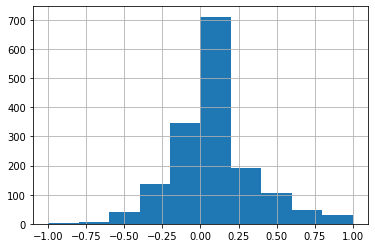

In [7]:
diff_df["performance_diff_x_minus_y"].hist()

<AxesSubplot: >

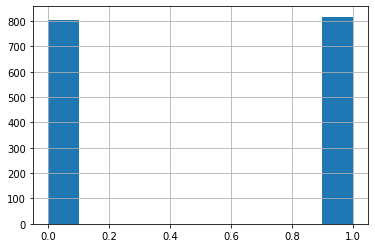

In [8]:
y.hist()

### fit a small decision tree

In [9]:
from sklearn import tree, metrics

clf = tree.DecisionTreeClassifier(max_depth=3).fit(x, y)
print(f"classes: {clf.classes_}")

classes: [0 1]


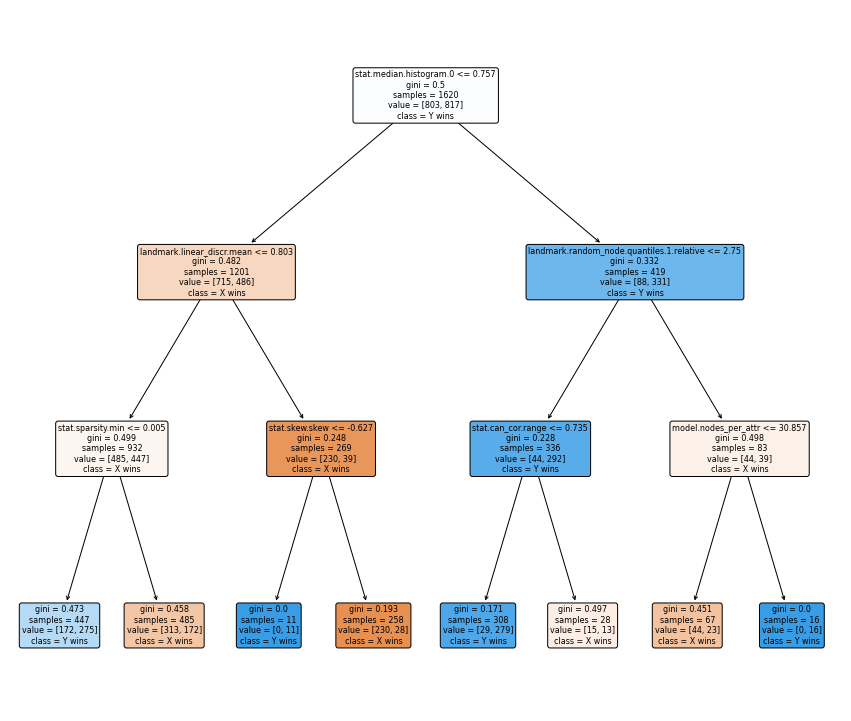

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 13))

annotations = tree.plot_tree(
    clf, 
    feature_names=nice_feature_names, 
    class_names=["X wins", "Y wins"], 
    filled=True, 
    ax=ax,
    fontsize=8,
    rounded=True,
)
# print(tree.export_text(clf_display, feature_names=feature_cols))
plt.show()